***Python Test Codes***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%gui qt

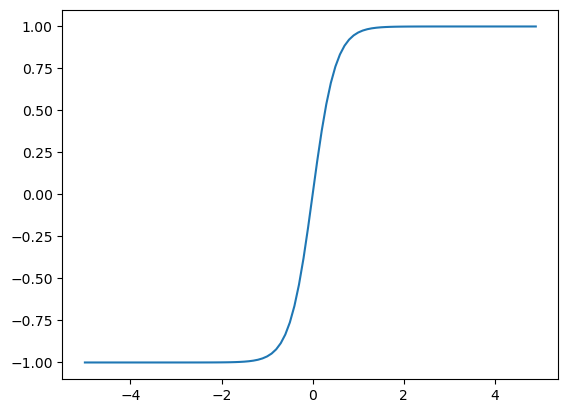

In [5]:
plt.plot(np.arange(-5,5,.1),np.tanh(2*np.arange(-5,5,.1)))

In [2]:
np.arange(1,10,1)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

The function `sklearn.datasets.make_moons()` is used to generate a toy dataset for binary classification — shaped like two interleaving crescent moons. It’s useful for testing classification algorithms, especially non-linear ones.

Text(0.5, 1.0, 'make_moons dataset')

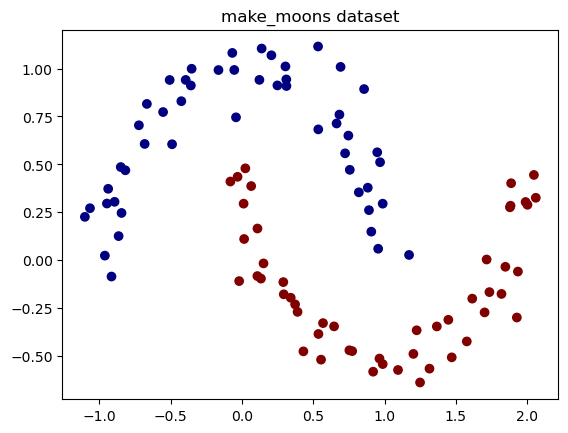

In [24]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.1, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet')
plt.title("make_moons dataset")



In [ ]:
m

ModuleNotFoundError: No module named 'torch'

In [37]:
#sum takes a 'start' parametter
print (sum([1,2,3])) #outputs 6
print (sum([1,2,3]),4) # outputs 10

6
6 4


In [ ]:
#nested for statement in a list constructor 

A = [
    [1],
    [2,3],
    [4,5,6],
    [7],
    [],
    [8,9]
]

[x for sl in A for x in sl]



[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [73]:
import copy
A  = [3,2]

def f(a,b):
    return a*b

def der(f,n):
    h = 0.0001
    B = copy.deepcopy(A)
    B[n] += h
    return (f(*B) - f(*A))/h 
    


def sddx(f,idx):
    h = 0.0000001
    B = copy.deepcopy(A)
    B[idx] += h
    A[idx] -= h
    return (f(*B) - f(*A))/(2*h) 

sddx(f,0)

1.9999999967268423

In [ ]:
#Symmetric differentiation of a funcation f(a,b,c)
def sgradf(a, b, c):
  def sddx(f,idx):
    h = 0.0001
    A = [a,b,c]
    B = copy.deepcopy(A)
    B[idx] += h
    A[idx] -= h
    return (f(*B) - f(*A))/(2*h)
    
  return [sddx(f,0), sddx(f,1), sddx(f,2)]


In [65]:
result

['odd', 'even', 'odd']

In [7]:
import pygame
import sys
import numpy as np 

pygame.init()
screen = pygame.display.set_mode((500, 500))
clock = pygame.time.Clock()

#track points
TPS = [
    [2,8],
    [4,6],
    [2,4],
    [5,2],
    [6,4],
    [8,4],
    [9,7]

]
# Screen dimensions
WIDTH, HEIGHT = 800, 600
screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("Moving Circle with Path")

# Colors
WHITE = (255, 255, 255)
RED = (255, 0, 0)
BLACK = (0, 0, 0)

# Circle properties
velocity = [2, 1.5]       # Movement speed
radius = 5


# Starting position
p = np.array(TPS[0])


#vector property
delta = 5
step_size = 2

# Path history
path_points = []


#scale for 500 x 500 stage 

TPS = [ [x*50 for x in sublist] for sublist in TPS ]
TPS = [np.array(point) for point in TPS]

x = 250
y = 250

#current_trac_point_id
ctpi = 0 

# ntpi = ctpi + 1


ctp = TPS[ctpi]
ntp = TPS[ctpi+1]
nntp = TPS[ctpi+2]

p = ctp 

def sdist (av,bv):
    distv = av-bv
    return np.inner(distv,distv)

def near (p1, p2, delta =2):

    if sdist(p1,p2) <= delta*delta :
        return True
    else: 
        return False 
    
# def near (p1, p2, delta =2):
#     dist = np.linalg.norm(p1 - p2)
#     if dist <= delta :
#         return True
#     else: 
#         return False 
def dist (ap, bp):
    dv = bp-ap
    return np.linalg.norm(dv)

def get_direction_uv(ap,bp):
    dv = bp-ap
    return dv / np.linalg.norm(dv)

def get_unit_vector(dv):
    return dv / np.linalg.norm(dv)

    
def update_direction(p,d_v,ctp, ntp, nntp):
    nd_uv = get_direction_uv(p,ntp)
    nnd_uv = get_direction_uv(p,nntp)
    nsdist = dist(ctp,ntp)
    rsdist = dist(p,ntp)
    r = rsdist/nsdist
    return get_unit_vector(  nd_uv*(1-r) + nnd_uv* (r) ) 

d_v = get_direction_uv(ctp,ntp)
def half_way(p,a,b):
    if dist(p,b) < dist(a,b)/2 :
        return True
    else: 
        return False
    
while True:

    #Computation area
    # sdist = 
    # if half_way(p,ctp,ntp) and ctpi +2 < len (TPS):

    if ctpi == len(TPS) - 1 :
        ctpi = 0
        p = TPS[ctpi]
        ctp = TPS[ctpi]
        ntp = TPS[ctpi+1]
        #nntp = TPS[ctpi+2]
    if near(p,ntp) and ctpi +1 < len (TPS):
        ctpi +=1
        ctp = TPS[ctpi]
        if ctpi != len(TPS) -1:
            ntp = TPS[ctpi+1]
        #nntp = TPS[ctpi+2]

        
    #unit vector of movement direction
    d_v = (ntp - ctp) /  np.linalg.norm(ntp - ctp)
    # d_v = update_direction(p,d_v,ctp, ntp, nntp)

    #scaled step vector 
    dp = d_v * step_size 

    #drawing below 
    screen.fill((255, 255, 255))
    for [xx,yy] in TPS:
        pygame.draw.circle(screen, (0, 255, 0), (xx, yy), 5)
    #update point 
    p = p + dp
    pygame.draw.circle(screen, (255, 0, 0), p, 7)


    pygame.draw.lines(screen, BLACK, False, TPS, 2)
    #pygame.draw.polygon(screen, (0, 0, 0), ((0, 100), (0, 200), (200, 200), (200, 300), (300, 150), (200, 0), (200, 100)))

    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            pygame.quit()
            sys.exit()

    pygame.display.flip()
    clock.tick(60)


/var/folders/g0/0llgnh8s6rsgptzpmkqqskd00000gn/T/ipykernel_91282/651687035.py:132: RuntimeWarning: invalid value encountered in divide
  d_v = (ntp - ctp) /  np.linalg.norm(ntp - ctp)


SystemExit: 

In [84]:
class Vec:
    def __init__(self,data = [0]):
        self.X = np.array(data,dtype= "float64")

    def __add__(self,other):
        return Vec(self.X + other.X) 
    
    def __sub__(self,other):
        return Vec(self.X - other.X) 
    
    def __mul__(self, other):
        return Vec(self.X * other)
        # return Vec(self.X * (other.X if isinstance(other,Vec) else other) )
    
    def __rmul__(self, other):
        # return Vec(self.X * (other.X if isinstance(other,Vec) else other) )
        return Vec(self.X * other)
    
    def __truediv__(self,other):
        return Vec(self.X/other)
    
    def inner(self,other):
        return np.inner(self.X,other.X)
    
    def norm(self):
        return np.linalg.norm(self.X)
    
    #unit vector 
    def unit(self):
        return self/self.norm()
    
    #euclidian distance
    def dist(self,other):
        return (self-other).norm()
    
    #square distance
    def sdist(self,other):
        d = self-other
        return d.inner(d)

    def near(self,other,length = 4):
        return True if self.sdist(other)< length*length else False 
    
    def dirto(self,other):
        return (other-self).unit()
        
    def moveto(self,other,delta):
        #unit vector
    
        direction = (other - self).unit()
        return self + direction * delta 

    # def tup(self):
        # return tuple([float(x) for x in self.X])
    
    def __repr__(self):
        return f"point: {str(self.X)}"

        
v = Vec([2,2])
w = Vec([2,6])


In [107]:
import pygame
import sys
import numpy as np 

pygame.init()
screen = pygame.display.set_mode((500, 500))
clock = pygame.time.Clock()
pygame.display.set_caption("Moving Circle with Path")

TPS = [
    [2,8],
    [4,6],
    [2,4],
    [5,2],
    [6,4],
    [8,4],
    [9,7]

]
TPS = [Vec(point)*50 for point in TPS]
#v = Vec([2,3])
#tuple(v.X)


WHITE = (255, 255, 255)
RED = (255, 0, 0)
BLACK = (0, 0, 0)
BLUE = (0,0,255)

curr = 0
next = curr+1
next_next = next+1

p = TPS[curr] * 1 # make a copy instead of reference assignment

pdir = (TPS[next]-TPS[curr]).unit()
while True: 
    screen.fill((255, 255, 255))
    for v in TPS:
        pygame.draw.circle(screen, (0, 255, 0), v.X, 5)

    pygame.draw.lines(screen, BLACK, False, [d.X for d in TPS], 2)

  

    # # curr_i = (curr_i + 1) if curr_i < len(TPS) -1 else 0 
    c_p = TPS[curr]
    n_p = TPS[next]
    nn_p = TPS[next_next]

    # #pdir = (TPS[next]-TPS[curr]).unit()
    # ndir = (n_p - p).unit()
    # nndir = (nn_p-p).unit()

    # l = p.dist(n_p)/(c_p.dist(n_p))
    # pdir = (pdir + (ndir * (1-l) + nndir * l)).unit()

    pdir = (TPS[next]-TPS[curr]).unit()
    p  = p + pdir*3

    
    if p.near(TPS[next]):
        curr = (curr+1)% len(TPS)
        next = (next+1) % len(TPS)
        next_next = (next_next +1) % len(TPS)
     
    
    pygame.draw.circle(screen, (255, 0, 0), p.X, 7) 

    pygame.draw.line(screen, BLUE, p.X,(p + pdir*20).X, width=1)
    pygame.draw.line(screen, BLACK, p.X,nn_p.X, width=1)
    
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            pygame.quit()
            sys.exit()


    pygame.display.flip()
    #clock.tick(60)
    pygame.time.delay(100)



SystemExit: 